In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from tensorflow.keras.datasets import cifar10

(x, y), (x_test, y_test)= cifar10.load_data()

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# Importing Necessary Libraries

from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import optimizers

In [5]:
# Loading Pretrained-Weights of VGG16

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
# vgg16.trainable = False
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Model Architecture n

um_of_classes= len(class_names)

model= models.Sequential()

# AddING VGG16-specific preprocessing
model.add(layers.Lambda(preprocess_input))

# Loading trained weights
model.add(vgg16)

# Flattening to feed into Hidden layers
model.add(Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))

# Output layer
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [18]:
# Training the model

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer=optimizers.RMSprop(learning_rate=5e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

reduce_lr = ReduceLROnPlateau( monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping( monitor='val_loss', patience=5, restore_best_weights=True )

history = model.fit(x, y, validation_split=0.1, epochs=10, callbacks=[reduce_lr, early_stop])

_m_='cifar_VGG16_1.keras'
model.save(_m_)
from google.colab import files
files.download('cifar_VGG16_1.keras')

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - acc: 0.8373 - loss: 0.4922 - val_acc: 0.7374 - val_loss: 0.9345 - learning_rate: 5.0000e-05
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - acc: 0.8685 - loss: 0.4019 - val_acc: 0.8108 - val_loss: 0.6162 - learning_rate: 5.0000e-05
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - acc: 0.8921 - loss: 0.3245 - val_acc: 0.8538 - val_loss: 0.4601 - learning_rate: 5.0000e-05
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - acc: 0.9167 - loss: 0.2513 - val_acc: 0.8386 - val_loss: 0.7294 - learning_rate: 5.0000e-05
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 0.9330 - loss: 0.2042
Epoch 5: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 46s 32ms/step - acc: 0.9330 - loss: 0.2042 - val_acc: 0.8172 - val_loss: 0.7743 - learning_rate: 5.0000e-05
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - acc: 0.9668 - loss: 0.1089 - val_acc: 0.863

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

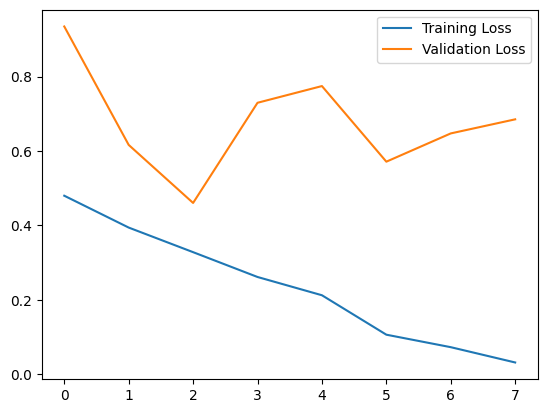

In [19]:
# Plot training/validation loss and accuracy:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [20]:
from tensorflow import keras

_m_='cifar_VGG16_1.keras'
# Load the saved model
model = keras.models.load_model(
    _m_,
    custom_objects={'preprocess_input': preprocess_input}
)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


In [21]:
# Test Accuracy

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - acc: 0.8437 - loss: 0.4980
Test Accuracy: 0.8399


In [22]:
# Precision, Recall & F1-Score

from sklearn.metrics import (
            precision_score, recall_score, f1_score)

precision= precision_score(y_test, y_pred_classes, average='macro')
recall= recall_score(y_test, y_pred_classes, average='macro')
f1= f1_score(y_test, y_pred_classes, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8538
Recall: 0.8399
F1-Score: 0.8431


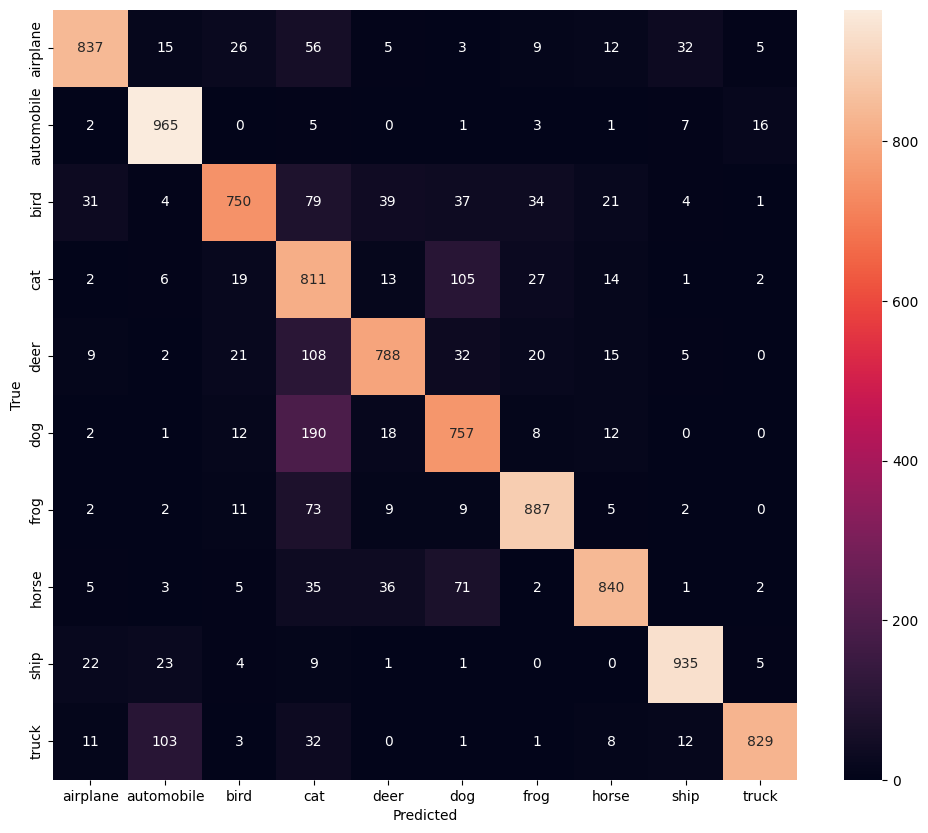

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [23]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm= confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig('confusion_Matrix(vgg).png')
from google.colab import files
files.download('confusion_Matrix(vgg).png')

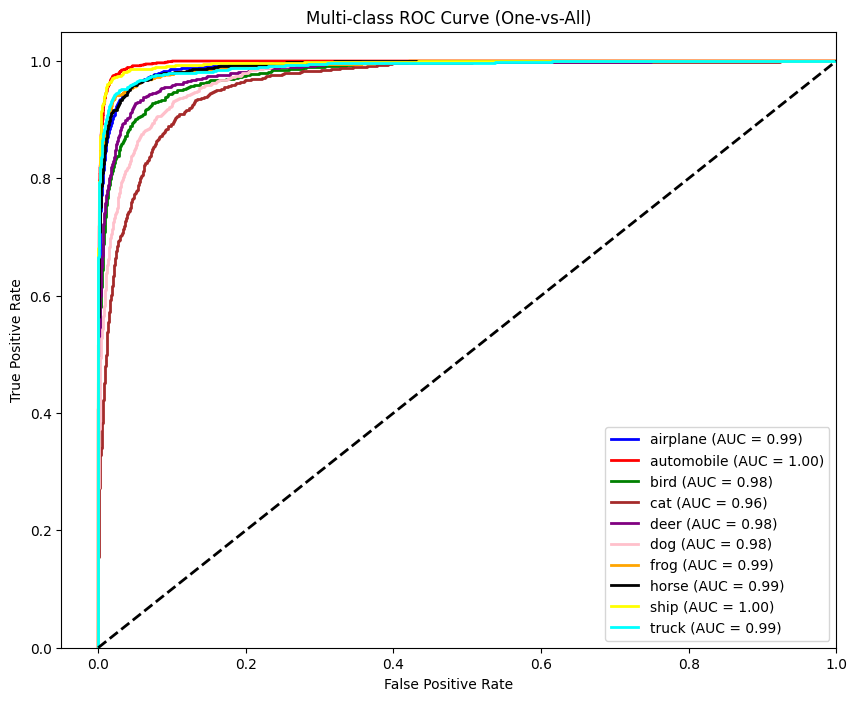

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output
y_test_bin= label_binarize(y_test, classes=range(10))
y_pred_bin = y_pred  # Already probability outputs

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:,i], y_pred_bin[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10,8))
colors = cycle(['blue', 'red', 'green', 'brown', 'purple',
               'pink', 'orange', 'black', 'yellow', 'cyan'])

for i, color, class_name in zip(range(10), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (AUC = {1:0.2f})'
             .format(class_name, roc_auc[i]))

plt.plot([0,1],[0,1],'k--', lw=2)
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (One-vs-All)')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC_Curve(resnet).png')
from google.colab import files
files.download('ROC_Curve(resnet).png')